##### AI TECH - Akademia Innowacyjnych Zastosowań Technologii Cyfrowych. Programu Operacyjnego Polska Cyfrowa na lata 2014-2020
<hr>


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<center>
    <h1 style = "font-size:48px; font-weight:normal"><b>AI</b>-TECH</style></h1>
    <br>
<br>
<br>
<br>
    <h1 style = "font-size:24px; font-weight:normal">Przykład 1 DO LABORATORIUM 1</style></h1>
    <h1 style = "font-size:24px">z GŁĘBOKIEGO PRZETWARZANIA TEKSTU I MOWY</style></h1>
    <h1 style = "font-size:24px">Sygnały cyfrowe, reprezentacje, parametryzacje</style></h1>
    <h1 style = "font-size:24px">Szymon Zaporowski</style></h1>
    <h3 style = "font-size:21px">Parametryzacje sygnałów fonicznych - przykłady</h3>
    <h3 style = 
</center>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
    </body>
    </html>

![stopka.svg](stopka.svg)

<center>
Projekt współfinansowany ze środków Unii Europejskiej w ramach Europejskiego Funduszu Rozwoju Regionalnego 
Program Operacyjny Polska Cyfrowa na lata 2014-2020,
Oś Priorytetowa nr 3 "Cyfrowe kompetencje społeczeństwa" Działanie  nr 3.2 "Innowacyjne rozwiązania na rzecz aktywizacji cyfrowej" 
Tytuł projektu:  „Akademia Innowacyjnych Zastosowań Technologii Cyfrowych (AI Tech)”
    </center>

# 1. Przykład 1

W tym przykładzie skupiono się na parametryzacji  sygnałów fonicznych. W ramach przykładów skupiono się na wskazaniu w jaki sposób wczytywać poprawnie dane audio do poszczególnych bibliotek pozwalających na obliczanie parametrów. W ramach przykładu pokazano bliblioteki librosa, spafe, python speech features oraz bibliotekę pydub służącą do edycji nagrań audio.
Poniżej pokazano w jaki sposób z wykorzystaniem biblioteki librosa można obliczyć współczynniki melcepstralne oraz w jaki sposób można obliczyć współczynniki gammatone, współczynniki liniowego kodowania predykcyjnego oraz współczynniki melcepstralne z użyciem bilbioteki spafe. 
Jak przykładowe sygnały posłużą nagrania mowy wykonane w Katedrze Systemów Multimedialnych w ramach rejestracji korpusu ELRA-based sentence recordings.

Aby poprawnie uruchomić przykłady należy załadować zawartość folderu "dane" do usługi Colab lub umieścić w folderze z notatnikiem zawierającym przykład. 

Najpierw dokonujemy załadowania bibliotek niezbędnych do uruchomienia ćwiczenia.

In [2]:
import librosa
import sklearn
import scipy
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf
from matplotlib.colors import ListedColormap
from sklearn import preprocessing
%matplotlib inline

In [1]:
!pip install spafe

!pip install python_speech_features
!pip install pydub
import spafe
import pydub
import python_speech_features

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 90 kB 3.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for python-speech-features: filename=python_speech_features-0.6-py3-none-any.whl size=5888 sha256=b43b7d5d4182b8522a3dfcf24e952e404866a6406239c388428d504920babef2
  Stored in directory: /root/.cache/pip/wheels/b0/0e/94/28cd6afa3cd5998a63eef99fe31777acd7d758f59cf24839eb
Successfully built python-speech-features
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Po imporcie i instalacji bibliotek czas na pokazanie sposbu liczenia pierwszej parametryzacji czyli współczynników melcepstralnych - MFCC. Do tego celu zostanie wykorzystana biblioteka librosa.

In [4]:
audio, sample_rate = librosa.load("Speaker_6_001.wav")
mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate)

print("Współczynniki MFCC:",mfcc)
print("Długość wektora współczynników MFCC:", len(mfcc))

Współczynniki MFCC: [[-6.5938373e+02 -6.5895410e+02 -6.5888818e+02 ... -6.5961450e+02
  -6.6020966e+02 -6.6317102e+02]
 [ 4.1526756e+01  4.2307831e+01  4.2517036e+01 ...  4.1371620e+01
   4.0578499e+01  3.6494270e+01]
 [ 3.8193924e+01  3.9426056e+01  3.9954144e+01 ...  3.8466255e+01
   3.7816845e+01  3.4034901e+01]
 ...
 [ 6.9452441e-01  4.3118626e-01  3.2416844e-01 ...  1.9001132e+00
   1.3963552e+00  4.9313247e-01]
 [-3.8362697e-01 -2.7612057e-01  3.9460927e-02 ...  1.6659360e+00
   9.0915281e-01  5.0636804e-01]
 [-1.4157040e+00 -9.6275079e-01 -2.0950457e-01 ...  1.0656561e+00
   2.5639147e-01  5.5266821e-01]]
Długość wektora współczynników MFCC: 20


W powyższym przykładzie wykorzystano standardowe nastawy biblioteki librosa służące do obliczenia współczynników melcepstralnych. W dokumentacji biblioteki wymienione są pozostałe współczynnki. Zachęcam do prób eksperymentów z nastawami.

In [5]:
audio, sample_rate = librosa.load("Speaker_6_001.wav")
print(type(audio))
print(sample_rate)
audio_trim, index = librosa.effects.trim(audio)
print(type(audio_trim))

mfcc = librosa.feature.mfcc(y=audio_trim, sr=sample_rate)

print("Współczynniki MFCC:",mfcc)

<class 'numpy.ndarray'>
22050
<class 'numpy.ndarray'>
Współczynniki MFCC: [[-6.5938373e+02 -6.5895410e+02 -6.5888818e+02 ... -6.5961450e+02
  -6.6020966e+02 -6.6317102e+02]
 [ 4.1526756e+01  4.2307831e+01  4.2517036e+01 ...  4.1371620e+01
   4.0578499e+01  3.6494270e+01]
 [ 3.8193924e+01  3.9426056e+01  3.9954144e+01 ...  3.8466255e+01
   3.7816845e+01  3.4034901e+01]
 ...
 [ 6.9452441e-01  4.3118626e-01  3.2416844e-01 ...  1.9001132e+00
   1.3963552e+00  4.9313247e-01]
 [-3.8362697e-01 -2.7612057e-01  3.9460927e-02 ...  1.6659360e+00
   9.0915281e-01  5.0636804e-01]
 [-1.4157040e+00 -9.6275079e-01 -2.0950457e-01 ...  1.0656561e+00
   2.5639147e-01  5.5266821e-01]]


W tym miejscu powinna pojawić się pewna wątpliwość. Czy aby w poprawny sposób liczymy współczynniki skoro w nagraniu pojawia się cisza? Może warto się jej pozbyć.
W tym celu można wykorzystać wbudowaną w bibliotekę librosa funkcję: 

```
librosa.effects.trim()
```
Funkcja ta pozwala na usunięcie ciszy z nagrania.
Sprawdźmy czy wartość MFCC zmieni się po użyciu tej funkcji.


In [6]:
y, sr = librosa.load("Speaker_6_001.wav")
y = np.array(y)
y, index= librosa.effects.trim(y)


mfcc_trim = librosa.feature.mfcc(y=y, sr=sr)
print("Współczynniki MFCC z nagrania z usuniętą ciszą:",mfcc_trim)
print("Współczynniki MFCC z całego nagrania:",mfcc)
print("Długość wektora współczynników MFCC z usuniętą ciszą:", len(mfcc_trim))
mfcc-mfcc_trim

Współczynniki MFCC z nagrania z usuniętą ciszą: [[-6.5938373e+02 -6.5895410e+02 -6.5888818e+02 ... -6.5961450e+02
  -6.6020966e+02 -6.6317102e+02]
 [ 4.1526756e+01  4.2307831e+01  4.2517036e+01 ...  4.1371620e+01
   4.0578499e+01  3.6494270e+01]
 [ 3.8193924e+01  3.9426056e+01  3.9954144e+01 ...  3.8466255e+01
   3.7816845e+01  3.4034901e+01]
 ...
 [ 6.9452441e-01  4.3118626e-01  3.2416844e-01 ...  1.9001132e+00
   1.3963552e+00  4.9313247e-01]
 [-3.8362697e-01 -2.7612057e-01  3.9460927e-02 ...  1.6659360e+00
   9.0915281e-01  5.0636804e-01]
 [-1.4157040e+00 -9.6275079e-01 -2.0950457e-01 ...  1.0656561e+00
   2.5639147e-01  5.5266821e-01]]
Współczynniki MFCC z całego nagrania: [[-6.5938373e+02 -6.5895410e+02 -6.5888818e+02 ... -6.5961450e+02
  -6.6020966e+02 -6.6317102e+02]
 [ 4.1526756e+01  4.2307831e+01  4.2517036e+01 ...  4.1371620e+01
   4.0578499e+01  3.6494270e+01]
 [ 3.8193924e+01  3.9426056e+01  3.9954144e+01 ...  3.8466255e+01
   3.7816845e+01  3.4034901e+01]
 ...
 [ 6.9452441

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Jak widać różnica między współczynnikami jest zerowa, jednak warto jest mieć na uwadze wykonanie tej operacji przy liczeniu parametrów, bo nie zawsze tak musi być. Żeby nie być gołosłownym wystarczy zamienić plik na przykładowy plik zawarty w bibliotece librosa czyli użyć polecenia:

```
audio, sample_rate = librosa.load(librosa.ex('trumpet'))
```


Kolejną ważną operacją jest normalizacja dźwięku. Nie chodzi tutaj o normalizację, którą zazwyczaj wykonuje się na danych czyli ustalenie wartości 1 dla najwyższej wartości z badanego zbioru a następnie dzielenie wszystkich wartości w zbiorze przez tę maksymalną wartość. W przypadku dźwięku nie jest to takie oczywiste. Poniższy przykład z użyciem biblioteki pydub powinien rozwiać przynajmniej część wątpliwości.

In [7]:
from pydub import AudioSegment

def match_target_amplitude(sound, target_dBFS):
  #zmiana ampitudy sygnału poprzez
    change_in_dBFS = target_dBFS - sound.dBFS
    print("Oczekiwana wartość amplitudy sygnału:",target_dBFS)
    print("Amplituda sygnału:",sound.dBFS)
    print("Wartość zmiany amplitudy:",change_in_dBFS)
    return sound.apply_gain(change_in_dBFS)

sound = AudioSegment.from_file("Speaker_6_001.wav", "wav")
normalized_sound = match_target_amplitude(sound, -24.0)
normalized_sound.export("nomrmalizedAudio.wav", format="wav")

Oczekiwana wartość amplitudy sygnału: -24.0
Amplituda sygnału: -31.11863115973439
Wartość zmiany amplitudy: 7.118631159734392


<_io.BufferedRandom name='nomrmalizedAudio.wav'>

Wykorzystując bibliotekę pydub dokonaliśmy generacji znormalizowanego pliku audio - normalizacja polegała na zmianie głośności do -24 dBFS czyli do cyfrowego odpowiednika analogowej wartości 0 dBu. Jak rozumieć tę wartość przedstawia poniższa grafika.

![Gain_chart_v2[1].PNG](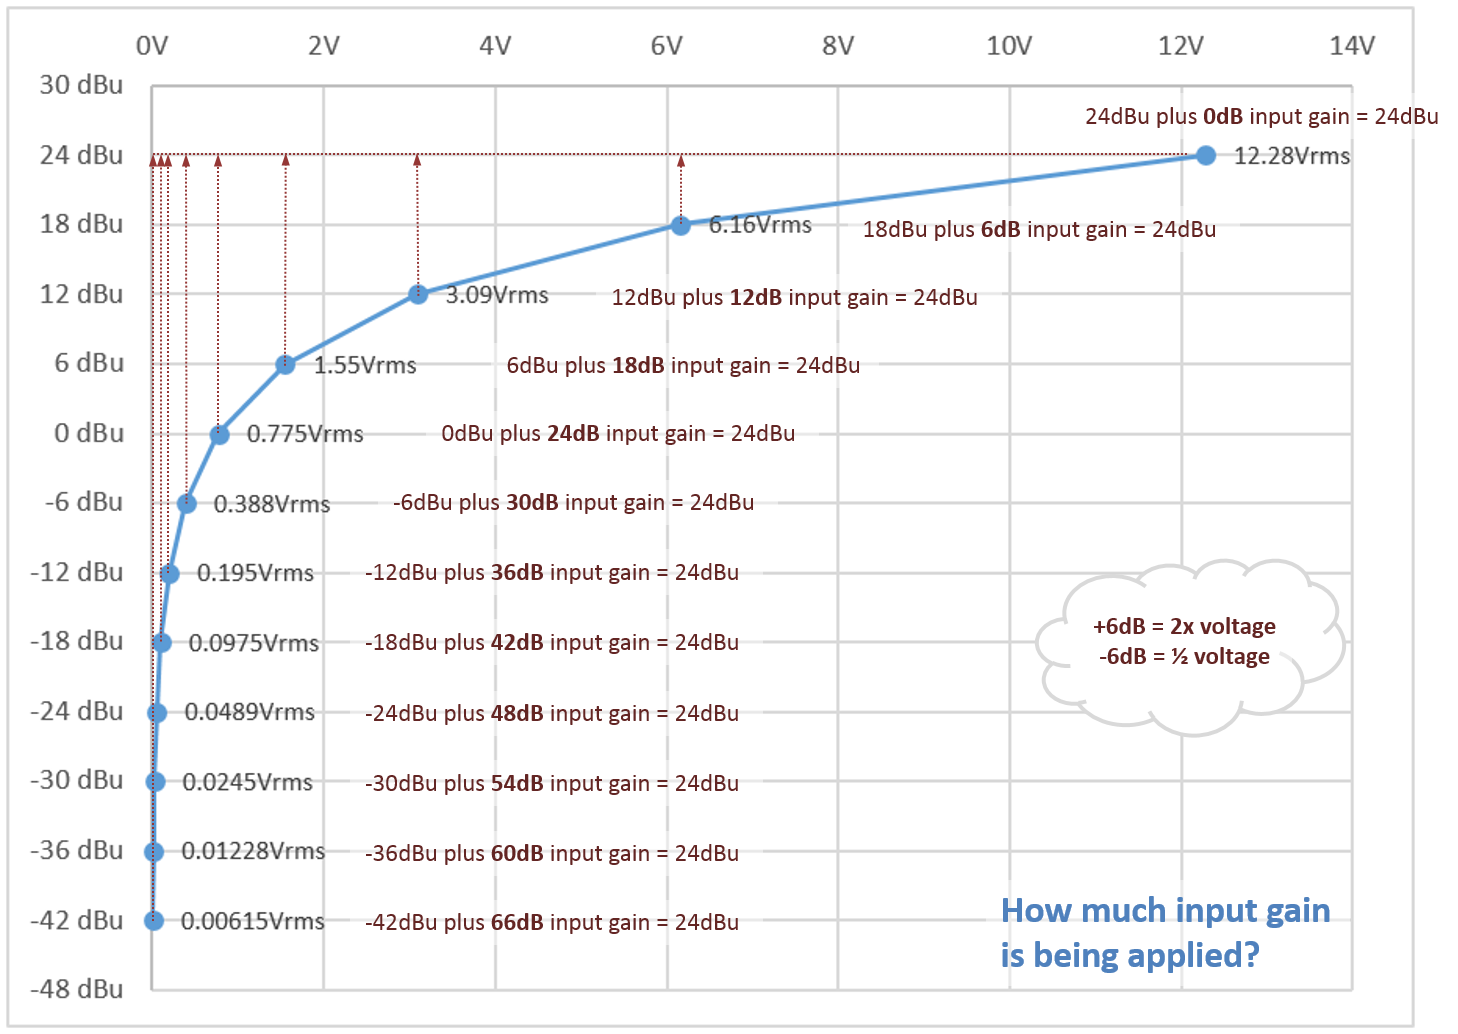)

Dokonajmy teraz ponwnego obliczenia MFCC dla sygnału audio poddanego normalizacji.

In [8]:
y, sr = librosa.load("nomrmalizedAudio.wav")
y = np.array(y)
y, index= librosa.effects.trim(y)


mfcc_trim_normalized = librosa.feature.mfcc(y=y, sr=sr)
print("MFCC po normalizacji audio:",mfcc_trim_normalized)
print("Różnnica w wartości MFCC między brakiem i normalizacją audio:",mfcc_trim_normalized-mfcc_trim)


MFCC po normalizacji audio: [[-5.7884967e+02 -5.7843805e+02 -5.7831201e+02 ... -5.7905353e+02
  -5.7965161e+02 -5.8263184e+02]
 [ 4.1524464e+01  4.2282539e+01  4.2566368e+01 ...  4.1401279e+01
   4.0605263e+01  3.6498131e+01]
 [ 3.8200336e+01  3.9416000e+01  3.9990993e+01 ...  3.8488503e+01
   3.7839760e+01  3.4044228e+01]
 ...
 [ 6.5235364e-01  3.9041176e-01  3.4729093e-01 ...  1.8940846e+00
   1.4051234e+00  4.8872271e-01]
 [-4.0788782e-01 -3.0474716e-01  5.1649183e-02 ...  1.6544690e+00
   9.2124546e-01  4.9047369e-01]
 [-1.4126368e+00 -9.6690905e-01 -2.0850834e-01 ...  1.0501062e+00
   2.7068660e-01  5.3459740e-01]]
Różnnica w wartości MFCC między brakiem i normalizacją audio: [[ 8.0534058e+01  8.0516052e+01  8.0576172e+01 ...  8.0560974e+01
   8.0558044e+01  8.0539185e+01]
 [-2.2926331e-03 -2.5291443e-02  4.9331665e-02 ...  2.9659271e-02
   2.6763916e-02  3.8604736e-03]
 [ 6.4125061e-03 -1.0055542e-02  3.6849976e-02 ...  2.2247314e-02
   2.2914886e-02  9.3269348e-03]
 ...
 [-4.217

Jak widać normalizacja wpływa na wartość uzyskanych parametrów. Co za tym idzie MFCC jest czułe na zmiany amplitudy sygnału i jest od nich zależne.
A co się stanie jeśli po wykonaniu normalizacji audio dokonamy normalizacji w sensie danych?

In [9]:
y, sr = librosa.load("nomrmalizedAudio.wav")
print(sr)
y = np.array(y)
y, index= librosa.effects.trim(y)
normalized_arr = preprocessing.normalize([y])
print(normalized_arr)

mfcc_normalized_2 = librosa.feature.mfcc(y=normalized_arr[0,:], sr=sr)
print("MFCC:",mfcc_normalized_2)
print("Różnica między normalizacjami MFCC:", mfcc_normalized_2-mfcc_trim_normalized)

22050
[[-5.45945943e-05 -8.59439775e-05 -7.82935408e-05 ...  2.03807068e-05
   1.72556284e-05  0.00000000e+00]]
MFCC: [[-8.61261889e+02 -8.60850249e+02 -8.60724170e+02 ... -8.61465753e+02
  -8.62063821e+02 -8.65044058e+02]
 [ 4.15244619e+01  4.22825413e+01  4.25663697e+01 ...  4.14012819e+01
   4.06052625e+01  3.64981288e+01]
 [ 3.82003359e+01  3.94160037e+01  3.99909935e+01 ...  3.84885035e+01
   3.78397616e+01  3.40442345e+01]
 ...
 [ 6.52354772e-01  3.90411717e-01  3.47291388e-01 ...  1.89408529e+00
   1.40512482e+00  4.88720511e-01]
 [-4.07884561e-01 -3.04744861e-01  5.16499709e-02 ...  1.65446913e+00
   9.21245996e-01  4.90472129e-01]
 [-1.41263557e+00 -9.66908834e-01 -2.08507259e-01 ...  1.05010798e+00
   2.70687184e-01  5.34596702e-01]]
Różnica między normalizacjami MFCC: [[-2.82412219e+02 -2.82412199e+02 -2.82412158e+02 ... -2.82412225e+02
  -2.82412210e+02 -2.82412222e+02]
 [-1.77226062e-06  1.92550903e-06  1.58971552e-06 ...  2.48233304e-06
  -3.02363603e-07 -1.98867183e-06]


Jak widać tutaj występuje różnica między wartościami. Liczenie parametrów mimo tego, że podana jest biblioteka i gotowy kod nie oznacza, że parametry policzone z użyciem tylko jednej funkcji będą poprawne.
Do tej pory wykorzystane były tylko standardowe nastawy przy liczeniu MFCC.
W tym przykładzie pokażę w jaki sposób można jeszcze zmienić sposób liczenia tych parametrów

[[-5.45945943e-05 -8.59439775e-05 -7.82935408e-05 ...  2.03807068e-05
   1.72556284e-05  0.00000000e+00]]


[Text(0.5, 1.0, 'MFCC')]

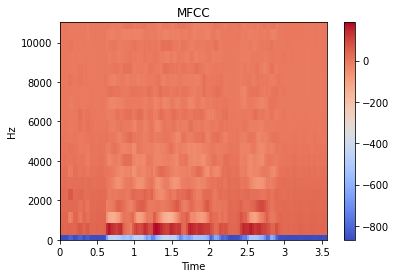

In [10]:
y, sr = librosa.load("nomrmalizedAudio.wav")
y = np.array(y)
y, index= librosa.effects.trim(y)
normalized_arr = preprocessing.normalize([y])
print(normalized_arr)

mfcc_normalized_2 = librosa.feature.mfcc(y=normalized_arr[0,:], sr=sr, )

import matplotlib.pyplot as plt
import librosa.display
fig, ax = plt.subplots()

img = librosa.display.specshow(mfcc_normalized_2, y_axis='linear', x_axis='time',sr=sr, ax=ax)

fig.colorbar(img, ax=ax)

ax.set(title='MFCC')

To co widać na powyższym wyniku to rzutowanie współczynników MFCC na płaszczyznę będącą wypadkową częstotliwości (oś y) i czasu (oś x).
Jak widać maskymalna wartość częstoliwości to nieco powyżej 11 kHz. Zgadza się to z twierdzeniem Shannona dotyczącym próbkowania. Nasza wartośc próbkowania to 22050 Hz. Zachęcam do próby zmiany częstotliwości próbkowania przy liczeniu MFCC zmieniając wartość zmiennej sr.

[Text(0.5, 1.0, 'MFCC z użyciem standardowej dyskretnej transformaty kosinusowej')]

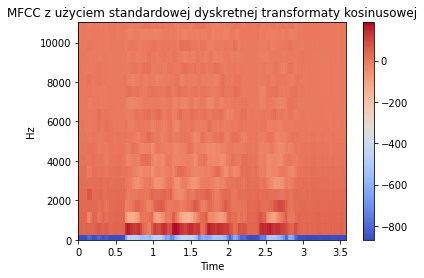

In [11]:
import matplotlib.pyplot as plt
import librosa.display
fig, ax = plt.subplots()


img = librosa.display.specshow(mfcc_normalized_2, y_axis='linear', x_axis='time',sr=sr, ax=ax)


fig.colorbar(img, ax=ax)

ax.set(title='MFCC z użyciem standardowej dyskretnej transformaty kosinusowej')

Zobaczymy teraz jak będzie wyglądało rzutowanie MFCC z użyciem transformacji zapożyczonej z Auditory Toolbox.

[Text(0.5, 1.0, 'Auditory toolbox - DCT typu 2)')]

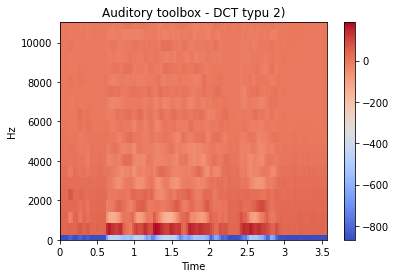

In [12]:
rastamat  = librosa.feature.mfcc(y=normalized_arr[0,:], sr=sr, dct_type=2)

fig, ax = plt.subplots()

img_2 = librosa.display.specshow(rastamat, y_axis='linear', x_axis='time',sr=sr, ax=ax)

fig.colorbar(img_2, ax=ax)

ax.set(title='Auditory toolbox - DCT typu 2)')



Między pierwszym, a drugim rzutowaniem nie widać różnicy. Nie powinno to dziwić, bo librosa standardowo korzysta z dct typu drugiego czyli właśnie zapożyczenia z Auditory Toolbox. Tym razem zmieniamy na serio sposób liczenia transformaty kosinusowej na implementację zbliżoną do implementacji zawartej w Hidden Markov Model Toolkit - jednym z najistotniejszych narzędzi wykorzustujących MFCC, głównie do rozpoznawania mowy

[Text(0.5, 1.0, 'HTK-style - DCT typu 3')]

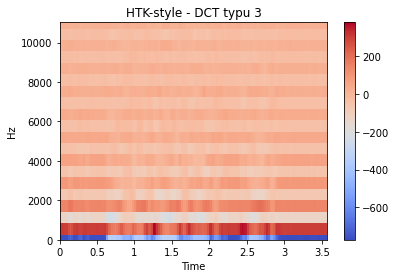

In [13]:
m_htk = librosa.feature.mfcc(y=normalized_arr[0,:], sr=sr, dct_type=3)
fig, ax = plt.subplots()
img_3 = librosa.display.specshow(m_htk, y_axis='linear', x_axis='time',sr=sr, ax=ax)
fig.colorbar(img_3, ax=ax)
ax.set(title='HTK-style - DCT typu 3')

Jak widać tym razem występuje różnica między rzutowaniami MFCC. W tym przypadku można zaobserwować poszczególne przedziały częstotliwości.

Tym razem pora na inną bibliotekę, chociaż kolejny raz będziemy liczyli MFCC.
Poniżej przykład w jaki sposób wykorzystać bibliotekę spafe do liczenia MFCC.
Należy zwrócić uwagę, że domyślny sposób wczytywania danych odbywa się poprzez bibliotekę scipy.

Obliczone wartości MFCC dla biblioteki SPAFE: [[20.4783763   5.3016532   8.51244273 ...  0.5009547  -0.05612411
  -0.1781466 ]
 [23.02512092  5.02750228  5.71139248 ... -0.35843784 -0.1931072
  -0.37757594]
 [17.14633744  3.18117973  8.4051579  ... -0.20826172 -0.0895256
   0.09551091]
 ...
 [24.48880864  5.52277968  5.62830494 ...  0.28268483 -0.18192154
  -0.12485859]
 [26.45772821  6.39316808  5.80211866 ...  0.37616463  0.1406687
   0.13749602]
 [17.55881127  2.72602402  7.32338195 ...  0.02962764  0.46671869
   0.46701063]]
355


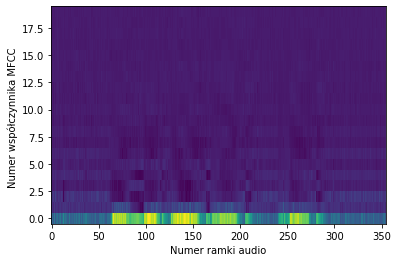

In [21]:
from spafe.utils import vis
from spafe.features.mfcc import mfcc, imfcc
from scipy.io import wavfile
import scipy.io


# Inicjalizacja zmiennych wejściowych
num_ceps = 20 # liczba współczynników
nfilts = 24 # liczba filtrów
nfft = 512 # długość fft
dct_type = 2, # rodzaj DCT
# visualize spectogram
#vis.spectogram(sig, fs)
    
# wczytanie audio
fs, sig = scipy.io.wavfile.read("nomrmalizedAudio.wav")#("Speaker_6_001.wav")


# obliczanie MFCCC
mfccs = mfcc(sig=sig,
             fs=fs,
             num_ceps=num_ceps,
             nfilts=nfilts,
             nfft=nfft)

print("Obliczone wartości MFCC dla biblioteki SPAFE:", mfccs)
print(len(mfccs))
# wizualizacja współczynników

def visualize_features(feats, ylabel, xlabel, cmap='viridis'):
    """
    visualize a matrix including the features coefficients. Each row corresponds
    to a frame.

    Args:
        feats  (array) : 2d array including the the features coefficients.
        ylabel   (str) : y-axis label.
        xlabel   (str) : x-axis label.
        cmap     (str) : matplotlib colormap to use.
    """
    plt.imshow(feats.T,
               origin='lower',
               aspect='auto',
               cmap=cmap,
               interpolation='nearest')
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show(block=False)
    plt.close()


visualize_features(mfccs, 'Numer współczynnika MFCC ', 'Numer ramki audio')
#vis.visualize_features(mfccs, 'Numer współczynnika MFCC ', 'Numer ramki audio')




Tutaj uwagę powinien zwrócić wynik rzutowania - tutaj mamy do czynienia z ramkami,a nie z sekundami trwania audio. Nie jest to przypadek, bo standardowo w cyfrowym przetwarzaniu dźwięku stosuje się tzw. ramki audio. Zazwyczaj jedna ramka trwa od 10 do 35 ms i doatkowo zakładkuje się o pewną wartość np. 5 ms między kolejnymi ramkami. 

Tym razem policzymy coś innego czyli współczynniki predykcyjnego kodowania liniowego. Ten typ współćzynników stosowany był głównie w telekomunikacji i syntezie mowy, jednak jego zastosowania to również rozpoznawanie mowy i uwierzytelnianie głosowe. Oprócz tego istnieją również cepstralne współczynniki predykcyjnego kodowania liniowego i je również policzymy.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: WavFileWarning: Chunk (non-data) not understood, skipping it.
  # Remove the CWD from sys.path while we load stuff.


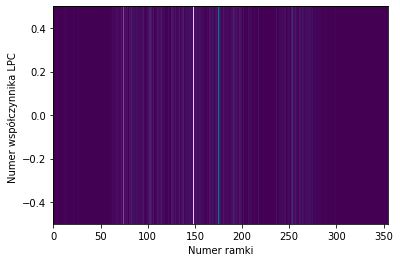

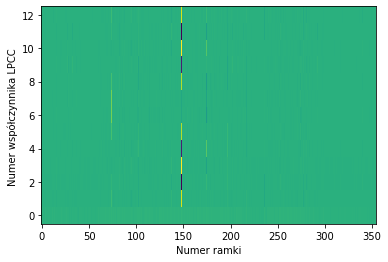

In [40]:
import scipy
from spafe.utils import vis
from spafe.features.lpc import lpc, lpcc

# Inicjalizacja zmiennych wejściowych
num_cepst = 13 #liczba współcznników
lifter = 0 # współczynnik odnosi się do tzw. inverse cepstral filtering

    
fs, sig = scipy.io.wavfile.read("Speaker_6_001.wav")

#obliczenie lpc
lpcs = lpc(sig=sig, fs=fs, order= num_cepst)
numpy_lpcs = np.asarray(lpcs[1])
#print(numpy_lpcs)

# wizualizacja współczynników lpc
visualize_features(numpy_lpcs, 'Numer współczynnika LPC ', 'Numer ramki')

# obliczenie lpcc
lpccs = lpcc(sig=sig, fs=fs, order=num_ceps, lifter=lifter )
# wizualizacja współczynników lpcc
visualize_features(lpccs, 'Numer współczynnika LPCC ', 'Numer ramki')

Tym razem pokazane będzie jak liczyć współczynniki gammatone, które są poniekąd dalekimi krewnymi MFCC. Kolejny raz użyta zostanie biblioteka Spafe.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: WavFileWarning: Chunk (non-data) not understood, skipping it.
  if sys.path[0] == '':


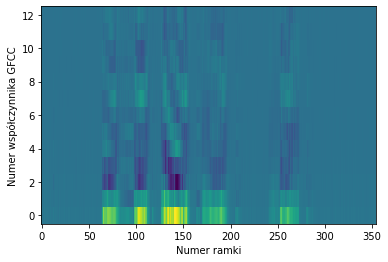

In [41]:
import scipy
from spafe.utils import vis
from spafe.features.gfcc import gfcc

# Inicjalizacja zmiennych wejściowych
num_ceps = 13 # liczba współczynników
nfilts = 24 # licbza filtrów
nfft = 512 # długość FFT

    
# read wav 
fs, sig = scipy.io.wavfile.read("Speaker_6_001.wav")

# compute features
gfccs = gfcc(sig=sig,
             fs=fs,
             num_ceps=num_ceps,
             nfilts=nfilts,
             nfft=nfft)

# visualize features
visualize_features(gfccs, 'Numer współczynnika GFCC', 'Numer ramki')

Obliczmy MFCC (to już ostatni raz!) z wykorzystaniem biblioteki python speech features, dokumentacja bliblioteki dostępna jest pod linkiem:
https://python-speech-features.readthedocs.io/en/latest/

In [42]:
from python_speech_features import mfcc
import scipy.io.wavfile as wav
(rate,sig) = wav.read("Speaker_6_001.wav")
python_speech_features.base.mfcc(sig,rate,nfft = 512)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[  8.37681399, -14.98504229,  20.74018057, ...,   8.50043285,
          4.8657263 ,   1.87631508],
       [  8.16179617, -22.31102509,  31.11104498, ...,  12.28971479,
          3.14735945,  -3.32653468],
       [  8.3595299 , -22.34106861,  31.9985319 , ...,  -4.45135751,
        -17.02441617,  -8.27537277],
       ...,
       [  8.39159422, -22.92505421,  28.73086323, ...,   5.90573863,
          4.39420479,   4.39528451],
       [  8.43038837, -22.71311369,  26.00943088, ...,  11.69890785,
         -2.92065106,  -1.19216468],
       [  8.34870929, -26.9719157 ,  20.33125926, ...,  -0.66008614,
         -3.26734463,   4.66924247]])

<p><b>Zadanie 1</b></p>

Wykorzystując wybrane pliki z ćw. 1. i przykłady z notatnika obliczyć parametry takie MFCC, GFCC, LPC oraz LPCC i porównać ze sobą parametry policzone dla plików z tą samą zawartością (mowa, muzyka, śpiew).
Opisać zaobserwowane różnice między wynikami. Co może być ich przyczyną?

<p><b>Zadanie 2</b></p>
<p>Porównać ze sobą współczynniki MFCC liczone różnymi bibliotekami (python speech features, librosa, spafe). Czy zaobserwowano różnice w wartościach, jeśli tak to jakie?

<p><b>Zadanie 3</b></p>

Używając dokumentacji wybranej biblioteki i zmieniając nastawy zaawansowanych ustawień funkcji parametryzujących sprawdzić jak zmienią się wartości obliczonych parametrów dla MFCC w przypadku wybranych bibliotek (zmienić nastawy typu dct, coef_num, hop_length, win_length, nfft) 

<p><b>Zadanie 4</b></p>

Wykorzystując bibliotekę pydub dokonać zmianny amplitudy sygnału audio w wybranych 2 plikach (w pierwszym zwiększyć amplitudę o 12 dB,w drugim zmniejszyć o 24 dB), następnie odsłuchać pliki z użyciem funkcji playback wbudowanej w bibliotekę pydub ( (https://github.com/jiaaro/pydub))
